## Backorder Prediction

A backorder refers to an order for a product that is temporarily out of stock or unavailable at the time of purchase. When a customer places an order for a product that is not currently in inventory, the seller accepts the order but cannot fulfill it immediately due to insufficient stock. A retailer using predictive models might notice that certain products are in high demand during the holiday season. By analyzing previous data, the model predicts demand for specific items. The inventory manager can then pre-order these items in larger quantities, ensuring they have enough stock to meet the surge in customer orders and avoid backorders.

##### Business Problem: 
A manufacturing company, producing and selling various products identified by SKUs, faces the challenge of predicting which items might soon go on backorder. With a large inventory to manage, the company aims to anticipate these shortages to prevent stockouts.

##### Background:
Predicting and preventing backorders can greatly affect a company's financial health. Backorders can lead to lost sales, dissatisfied customers, and harm the company's reputation. Conversely, keeping too much inventory is expensive, tying up capital, using up storage space, and increasing the risk of obsolescence.


Cost are as following:
The company sells 1,000 units on average per month at a price of dollar 60 per unit (avg cost).
The cost of of warehousing and maintaining these units is dollar 10 per unit per month (avg cost)


### Import and install python libraries

In [30]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

np.random.seed(113)

In [31]:
# loading the source data for preprocessing
df = pd.read_csv("C:/Users/simra/Downloads/Backorder.csv")

### Load the Data

Data features are as follows:

sku - Random ID for the product

national_inv - Current inventory level for the part

lead_time - Transit time for product (if available)

in_transit_qty - Amount of product in transit from source

forecast_3_month - Forecast sales for the next 3 months

forecast_6_month - Forecast sales for the next 6 months

forecast_9_month - Forecast sales for the next 9 months

sales_1_month - Sales quantity for the prior 1 month time period

sales_3_month - Sales quantity for the prior 3 month time period

sales_6_month - Sales quantity for the prior 6 month time period

sales_9_month - Sales quantity for the prior 9 month time period

min_bank - Minimum recommend amount to stock

potential_issue - Source issue for part identified

pieces_past_due - Parts overdue from source

perf_6_month_avg - Source performance for prior 6 month period

perf_12_month_avg - Source performance for prior 12 month period

local_bo_qty - Amount of stock orders overdue

deck_risk - Part risk flag

oe_constraint - Part risk flag

ppap_risk - Part risk flag

stop_auto_buy - Part risk flag

rev_stop - Part risk flag

went_on_backorder - Product actually went on backorder. This is the target variable.

### Exploratory Data Analysis 

Key considerations of the data:

Imbalanced outcome: We will First figure out if the data is imbalanced or not

Missing data: We will find if any variables have data that are missing. 
n>>p: There are many observations relative to the number of predictors (22). We will also take care for dimensionality reduction

In [32]:
# look at the data
df.sample(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
5669,3459080,6,8,0,0,2,6,1,3,8,...,0,0.18,0.33,0,No,No,No,Yes,No,No
4107,3510063,0,2,0,27,27,27,0,0,0,...,0,-99.00,0.00,0,Yes,No,No,Yes,No,Yes
6383,3459091,18,8,0,0,0,0,0,0,0,...,0,0.85,0.85,0,No,No,No,Yes,No,No
1360,3368409,56,8,0,0,0,0,0,0,0,...,0,0.98,0.99,0,No,No,No,Yes,No,No
7869,3460735,11,4,0,0,0,0,1,1,3,...,0,0.73,0.78,0,No,No,No,Yes,No,No


In [18]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [19]:
# generate a basic summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                8230 non-null   int64  
 1   national_inv       8230 non-null   int64  
 2   lead_time          8230 non-null   int64  
 3   in_transit_qty     8230 non-null   int64  
 4   forecast_3_month   8230 non-null   int64  
 5   forecast_6_month   8230 non-null   int64  
 6   forecast_9_month   8230 non-null   int64  
 7   sales_1_month      8230 non-null   int64  
 8   sales_3_month      8230 non-null   int64  
 9   sales_6_month      8230 non-null   int64  
 10  sales_9_month      8230 non-null   int64  
 11  min_bank           8230 non-null   int64  
 12  potential_issue    8230 non-null   object 
 13  pieces_past_due    8230 non-null   int64  
 14  perf_6_month_avg   8230 non-null   float64
 15  perf_12_month_avg  8230 non-null   float64
 16  local_bo_qty       8230 

In [20]:
# generate a statistical summary of the numeric value in the data
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,8.230000e+03,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000
mean,3.432955e+06,334.923451,7.616403,29.324180,165.995140,303.445565,439.712029,47.124180,159.579101,302.807290,432.799271,48.449210,1.023086,-2.095063,-1.588577,1.551519
std,5.460683e+04,4822.548365,6.828169,691.169906,2879.685922,5552.571012,8231.427999,949.764117,3207.841255,6009.166066,8030.355439,1144.503728,30.203996,16.653075,15.138120,46.488555
min,3.284988e+06,-2567.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,3.410808e+06,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.660000,0.000000
50%,3.458436e+06,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.820000,0.810000,0.000000
75%,3.460634e+06,43.000000,8.000000,0.000000,12.000000,22.000000,33.000000,5.000000,15.000000,30.000000,44.000000,2.000000,0.000000,0.970000,0.950000,0.000000
max,3.525576e+06,353974.000000,52.000000,47461.000000,179648.000000,331712.000000,483776.000000,57555.000000,205979.000000,388721.000000,522624.000000,86255.000000,1364.000000,1.000000,1.000000,2837.000000


In [21]:
# Check the missing values
df.isna().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [33]:
# create a list of these catagorical variables, dtype=object.
category_var_list = list(df.select_dtypes(include='object').columns)
category_var_list

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

### Data Visualisation for Imbalance

Product went on backorder 1983 times 24.094775212636694 %
Product Not went on backorder 6247 times 75.90522478736331 %


([<matplotlib.patches.Wedge at 0x24369590b80>,
 [Text(-0.7996199812214853, 0.7553859183433007, 'Product Not went on backorder'),
  Text(0.9450055577276103, -0.8927286798708376, 'Product went on backorder')],
 [Text(-0.43615635339353737, 0.4120286827327095, '75.9%'),
  Text(0.5815418816785294, -0.5493714953051307, '24.1%')])

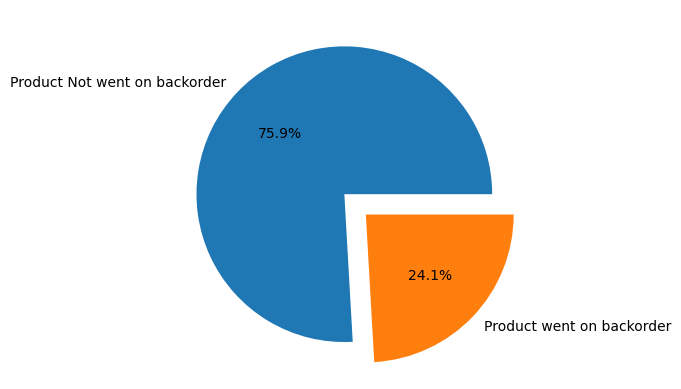

In [8]:
p = df.went_on_backorder.value_counts()
print("Product went on backorder",p[1], "times",(p[1]*100/(p[1]+p[0])) , "%")
print("Product Not went on backorder",p[0], "times" , (p[0]*100/(p[1]+p[0])), "%")

fig, ax = plt.subplots()

labels = ['Product Not went on backorder', 
         'Product went on backorder']
explode = (0, 0.2) 
percentages = [p[0]*100/(p[1]+p[0]), p[1]*100/(p[1]+p[0])]

#Draw pie chart 
ax.pie(percentages, labels=labels, shadow=False,explode=explode,autopct='%1.1f%%')

##### We have imbalanced data distribution since only 27.2 % labels are having output 1 (i.e.) Backorder initiated.

### Preprocessing: 
1. Numeric features vary in scale, with some having large ranges, so normalizing these features is necessary.
2. Categorical features, which have values of Yes and No, can be converted to binary numbers 0 and 1.
3. SKU is a unique identifier that is not relevant for classification, so it can be removed.
4. The data is highly imbalanced and should be balanced using sampling or other methods after splitting into training and testing sets.
5. There are no NA values in the data that need to be addressed.

In [34]:
# Change categorical features from string to numerical
Cols_for_str_to_bool = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
                        'stop_auto_buy', 'rev_stop', 'went_on_backorder']

for col_name in Cols_for_str_to_bool:
    df[col_name] = df[col_name].map({'No':0, 'Yes':1})

### Correlation plot for dimensionality reduction

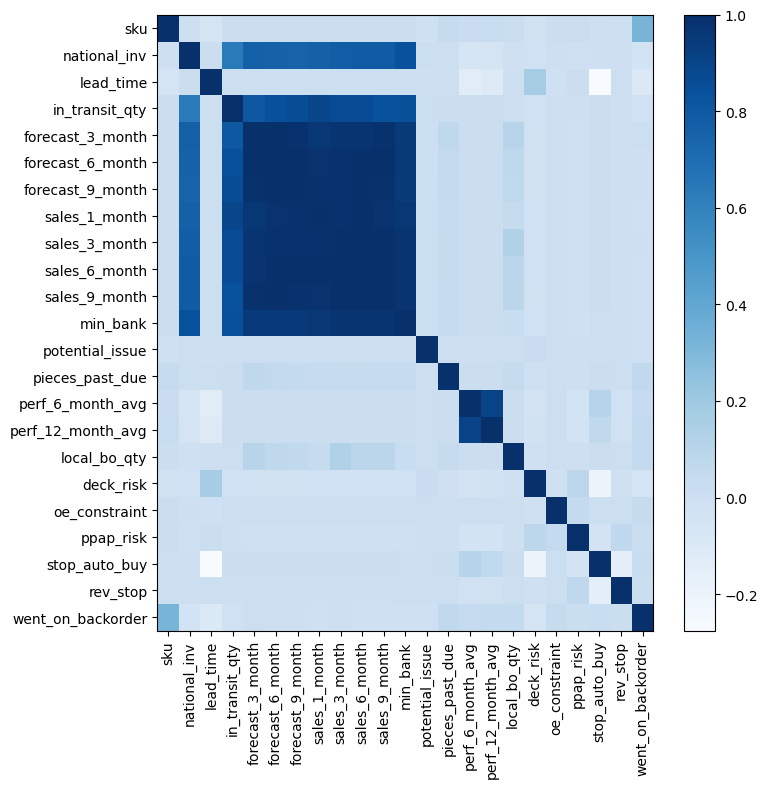

In [24]:
# Set figure size 
fig = plt.figure(figsize=(8,8)) 

# Plot a correlation matrix
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto')

# Display legend showing what the colours mean
plt.colorbar()

# Add tick marks and feature names for ease of reading
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

# Show the plot
plt.show()

#### Feature Selection
Forecast values over different time frames are closely related, as shown by the correlation matrix, and backorders happen only when forecast values are low. Similarly, sales over different time frames are also closely related, and backorders occur only when sales are low.

Due to these strong relationships, we will use just one feature to represent all these related features in our machine learning models. We chose sales_1_month because it directly measures past sales, while other features like quantities in transit, recommended minimum stock, and forecasts are based on past sales.

In [36]:
#feature selection 
df.drop(['sales_3_month', 'sales_6_month', 'sales_9_month','perf_12_month_avg','forecast_3_month', 
             'forecast_6_month', 'forecast_9_month'], axis=1, inplace = True)

In [37]:
# Dropping SKU
df.drop(['sku'], axis=1, inplace = True)

In [40]:
df.sample(5)

,national_inv,lead_time,in_transit_qty,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2001,3,4,0,0,0,0,0,0.70,0,0,0,0,stop_auto_buy,0,0
3186,12,2,0,58,0,0,0,0.41,0,0,0,0,stop_auto_buy,0,went_on_backorder
7671,3,8,0,0,0,0,0,0.96,0,0,0,0,stop_auto_buy,0,0
3072,0,2,0,0,0,0,0,0.98,0,0,0,ppap_risk,stop_auto_buy,0,went_on_backorder
3579,10,2,0,0,0,0,0,0.99,0,deck_risk,0,0,stop_auto_buy,0,went_on_backorder


In [39]:
# Replace "Yes" with "potential_issue"
df['potential_issue'].replace(1, 'potential_issue', inplace=True)
df['deck_risk'].replace(1, 'deck_risk', inplace=True)
df['oe_constraint'].replace(1, 'oe_constraint', inplace=True)
df['ppap_risk'].replace(1, 'ppap_risk', inplace=True)
df['stop_auto_buy'].replace(1, 'stop_auto_buy', inplace=True)
df['rev_stop'].replace(1, 'rev_stop', inplace=True)
df['went_on_backorder'].replace(1, 'went_on_backorder', inplace=True)


### Dummy encoding

In [41]:
# Label Encoding
df = pd.concat([df, pd.get_dummies(df[category_var_list],prefix = "yes",drop_first = True)], axis=1)
df.drop(category_var_list, axis=1, inplace = True)

In [42]:
# look at the data
df.sample(5)

,national_inv,lead_time,in_transit_qty,sales_1_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty,yes_potential_issue,yes_deck_risk,yes_oe_constraint,yes_ppap_risk,yes_stop_auto_buy,yes_rev_stop,yes_went_on_backorder
551,53,8,0,0,0,0,0.41,0,0,0,0,0,1,0,0
4786,2485,2,0,0,0,0,0.68,0,0,0,0,0,1,0,0
2850,1,8,0,3,1,0,0.78,0,0,0,0,0,1,0,1
1798,7,8,0,0,0,0,0.83,0,0,0,0,0,1,0,0
1720,105,8,1,25,45,0,0.99,0,0,0,0,0,1,0,0


### Data Split (train/test)
Splitting the data into two sets train and test for model training and testing.

In [43]:
# split the data into validation and training set
train_df, test_df = train_test_split(df, test_size=0.3)

# to reduce repetition in later code, creating variables to represent the columns
# that are predictors and target
target = 'yes_went_on_backorder'
predictors = list(df.columns)
predictors.remove(target)

### Scaling

Create a common scale between the numberic columns by standardizing each numeric column

In [44]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['national_inv', 'lead_time', 'in_transit_qty', 'sales_1_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array

test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object

In [45]:
X_train = train_df[predictors]
y_train = train_df[target] # train_target is now a series object
X_test = test_df[predictors]
y_test = test_df[target] # validation_target is now a series object

In [46]:
y_train.value_counts()

0    4403
1    1358
Name: yes_went_on_backorder, dtype: int64

### Data Balancing

We will use an oversamplying technique to address any necessary date imbalance.
Oversampled data perform well as compared to Undersampled data,because of loss of data while undersampling.

In [47]:
# transform the dataset using over sampeling to hadel imbalanced data 
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy = 'minority')
X_train, y_train = os.fit_resample(X_train, y_train)
y_train.value_counts()

0    4403
1    4403
Name: yes_went_on_backorder, dtype: int64

### Saving the data

In [48]:
train_df.to_csv('./bop_train_df.csv', index=False)
X_train.to_csv('./bop_X_train.csv', index=False)
y_train.to_csv('./bop_y_train.csv', index=False)
test_df.to_csv('./bop_test_df.csv', index=False)
X_test.to_csv('./bop_X_test.csv', index=False)
y_test.to_csv('./bop_y_test.csv', index=False)